First, lets reconstruct dimuon z mass.
reaplying previous code. Using the following criteria to select two well-defined and isolated muons.

In [80]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward
import uproot_methods

In [81]:
file=uproot.open('~/Downloads/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-pythia8.root')['Events']
muon=file.arrays(['Muon_pt','Muon_eta','Muon_phi','Muon_mass','Muon_charge','Muon_isGlobal','Muon_genPartIdx'], namedecode='utf-8')

In [82]:
muon_table=awkward.Table(muon)

In [83]:
muon_mask=(muon['Muon_genPartIdx']!=-1)& (muon['Muon_isGlobal']==1)& (muon['Muon_pt']>20)& (abs(muon['Muon_eta'])<2.4)

In [84]:
muon_mask

<JaggedArray [[True] [] [True True False] ... [True True] [True True] [True True False]] at 0x7fdda5866390>

In [85]:
type(muon_table)

awkward.array.table.Table

In [86]:
muon_mask.sum()

array([1, 0, 2, ..., 2, 2, 2])

In [87]:
(muon_mask.sum()==2).sum()

57174

In [88]:
(muon_mask.sum()==3).sum()

27

In [89]:
(muon_mask.sum()==1).sum()

42958

Note here if we write a for loop, then 42958 events are don't woth to loop over it. By using columnar method, time is saved.

In [90]:
(muon_mask.sum()==4).sum()

1

In [91]:
(muon_mask.sum()==5).sum()

0

In [92]:
(muon_mask.sum()==6).sum()

0

In [93]:
two_muon_table=muon_table[muon_mask.sum()==2]

Lets make sure muons in eaach events have opposite charge

In [94]:
opposite_sign_muon_mask=two_muon_table['Muon_charge'][:,0]!=two_muon_table['Muon_charge'][:,1]

In [95]:
opposite_sign_muon_mask.sum()

57082

In [96]:
two_muon_p4=uproot_methods.TLorentzVectorArray.from_ptetaphim(two_muon_table['Muon_pt'], 
                                                              two_muon_table['Muon_eta'], 
                                                              two_muon_table['Muon_phi'],
                                                              two_muon_table['Muon_mass'])

In [102]:
dimuon_p4=two_muon_p4[:,0]+two_muon_p4[:,1]
#dimuon_p4.mass

Text(0, 0.5, 'Events')

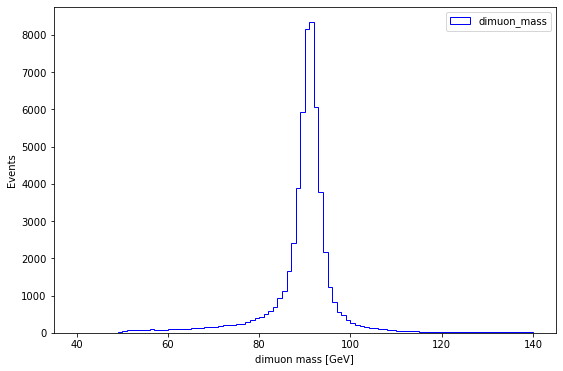

In [101]:
plt.figure(figsize=(9,6))
plt.hist(dimuon_p4.mass, bins=100, range=[40,140], histtype='step', color='blue', label='dimuon_mass')
plt.legend()
plt.xlabel('dimuon mass [GeV]')
plt.ylabel('Events')